In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "toscana"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,9,Toscana,2,0,2,0,2,2,2,...,0.0,156.0,0.0,0.0,0.00,100.00,1.28,0.00,0.00,0.00
1,2020-02-26T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,67.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,47.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,9,Toscana,5,0,5,2,7,5,6,...,0.0,27.0,0.0,2.0,0.00,71.43,22.22,0.00,0.00,250.00
4,2020-02-29T17:00:00,9,Toscana,7,0,7,3,10,3,3,...,0.0,94.0,0.0,1.0,0.00,70.00,3.19,0.00,0.00,42.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020-12-04T17:00:00,9,Toscana,1418,263,1681,31598,33279,-2151,1071,...,42.0,14074.0,4152.0,-2093.0,15.65,5.05,7.61,25.79,-3.31,-6.07
284,2020-12-05T17:00:00,9,Toscana,1373,261,1634,28910,30544,-2735,769,...,41.0,13229.0,4063.0,-2688.0,15.97,5.35,5.81,18.93,-0.76,-8.22
285,2020-12-06T17:00:00,9,Toscana,1360,252,1612,27587,29199,-1345,753,...,28.0,12142.0,3808.0,-1323.0,15.63,5.52,6.20,19.77,-3.45,-4.40
286,2020-12-07T17:00:00,9,Toscana,1365,253,1618,26466,28084,-1115,593,...,31.0,7812.0,2185.0,-1121.0,15.64,5.76,7.59,27.14,0.40,-3.82


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 8, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 428
Nuovi tamponi: 8110.0
Percentuale nuovi positivi/nuovi tamponi: 5.3 %
Nuovi guariti: 2453.0
Nuovi deceduti: 35.0
Variazione positivi ricoverati con sintomi: -30.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: -2030.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 8, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-09T17:00:00,9,Toscana,140,30,170,4951,5121,372,483,...,3.0,10781.0,7299.0,361.0,17.65,3.32,4.48,6.62,11.11,7.83
1,2020-10-10T17:00:00,9,Toscana,160,30,190,5450,5640,519,548,...,0.0,11237.0,7878.0,499.0,15.79,3.37,4.88,6.96,0.00,10.13
2,2020-10-11T17:00:00,9,Toscana,186,31,217,5925,6142,502,517,...,1.0,11394.0,8132.0,475.0,14.29,3.53,4.54,6.36,3.33,8.90
3,2020-10-12T17:00:00,9,Toscana,205,40,245,6259,6504,362,466,...,6.0,8958.0,6238.0,334.0,16.33,3.77,5.20,7.47,29.03,5.89
4,2020-10-13T17:00:00,9,Toscana,218,44,262,6655,6917,413,480,...,1.0,8172.0,5395.0,396.0,16.79,3.79,5.87,8.90,10.00,6.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-04T17:00:00,9,Toscana,1418,263,1681,31598,33279,-2151,1071,...,42.0,14074.0,4152.0,-2093.0,15.65,5.05,7.61,25.79,-3.31,-6.07
57,2020-12-05T17:00:00,9,Toscana,1373,261,1634,28910,30544,-2735,769,...,41.0,13229.0,4063.0,-2688.0,15.97,5.35,5.81,18.93,-0.76,-8.22
58,2020-12-06T17:00:00,9,Toscana,1360,252,1612,27587,29199,-1345,753,...,28.0,12142.0,3808.0,-1323.0,15.63,5.52,6.20,19.77,-3.45,-4.40
59,2020-12-07T17:00:00,9,Toscana,1365,253,1618,26466,28084,-1115,593,...,31.0,7812.0,2185.0,-1121.0,15.64,5.76,7.59,27.14,0.40,-3.82


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

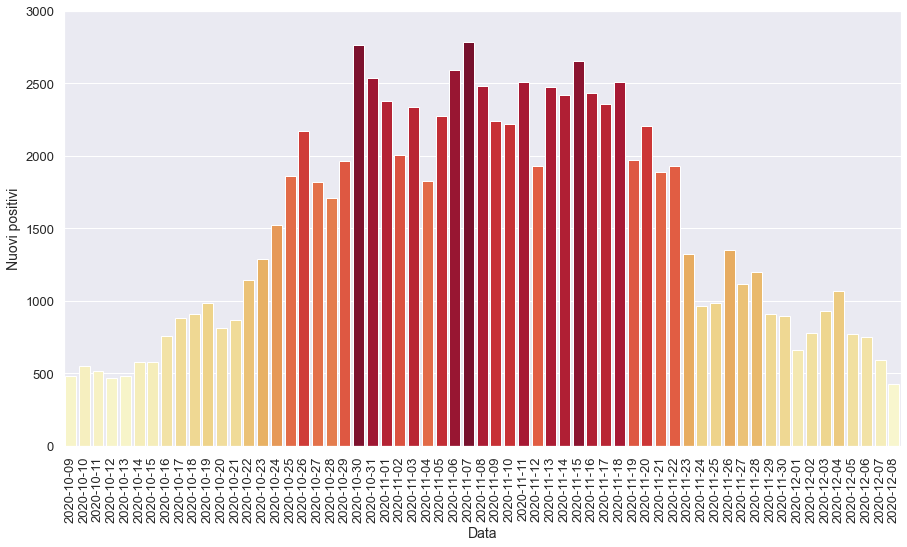

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

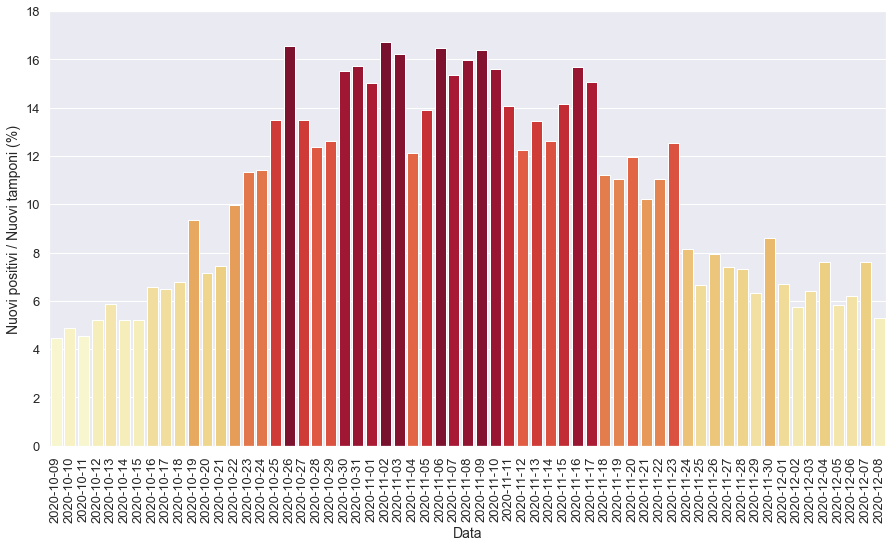

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

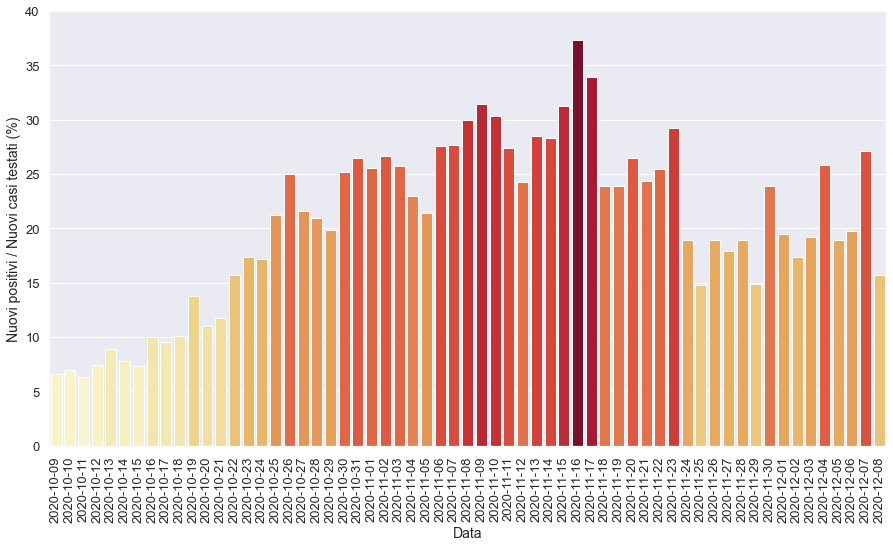

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

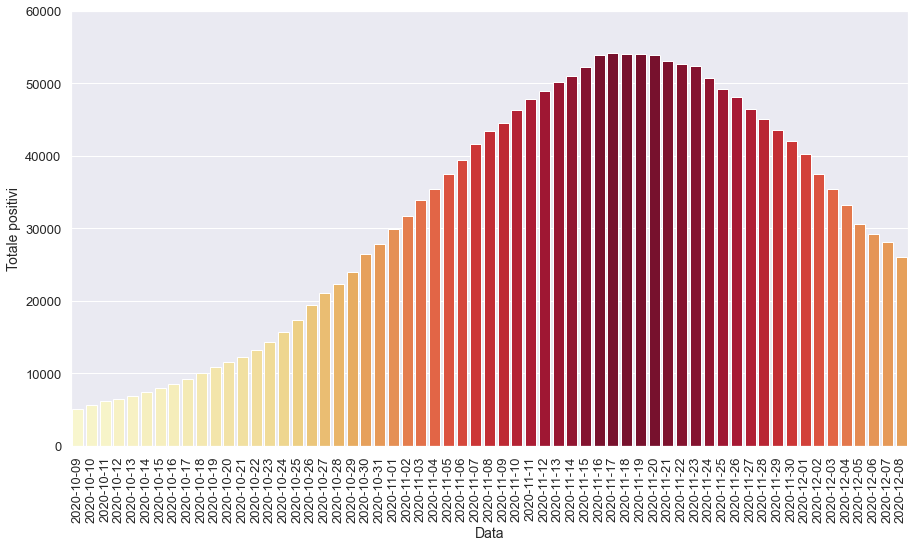

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

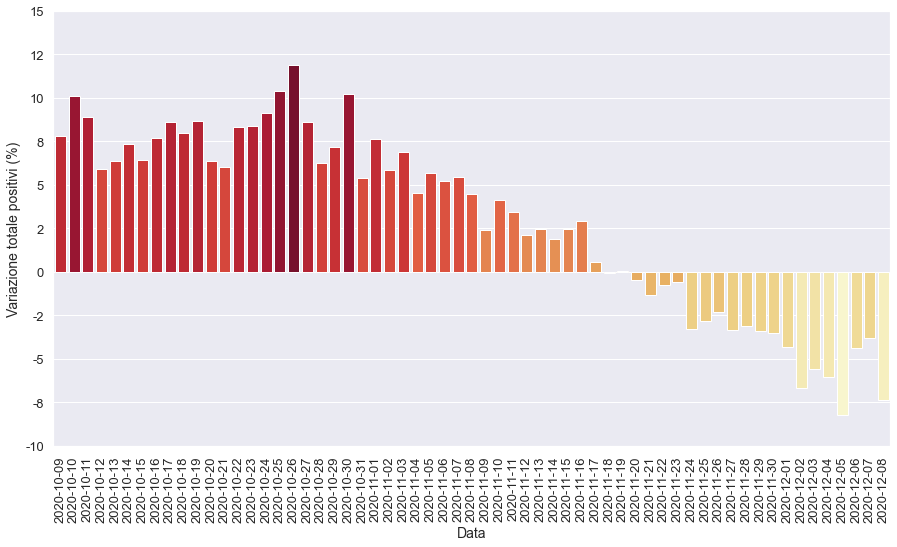

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

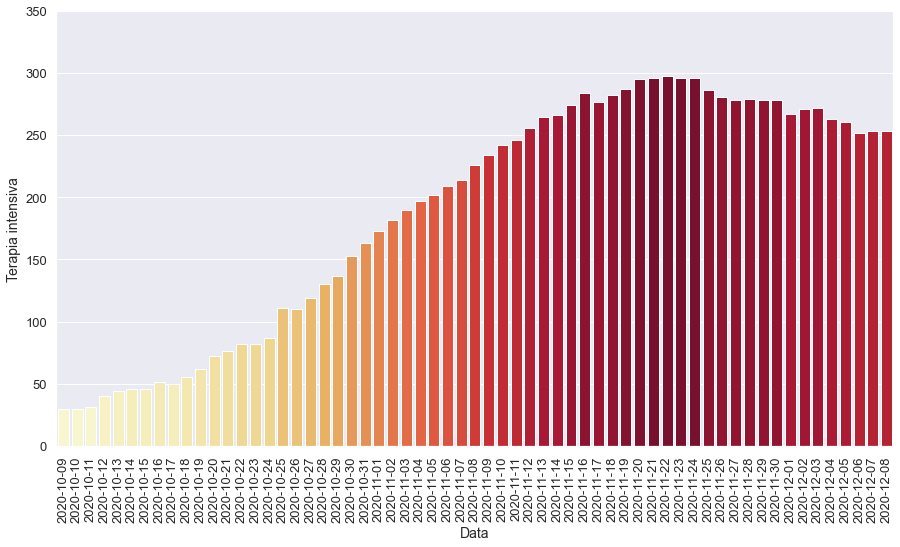

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

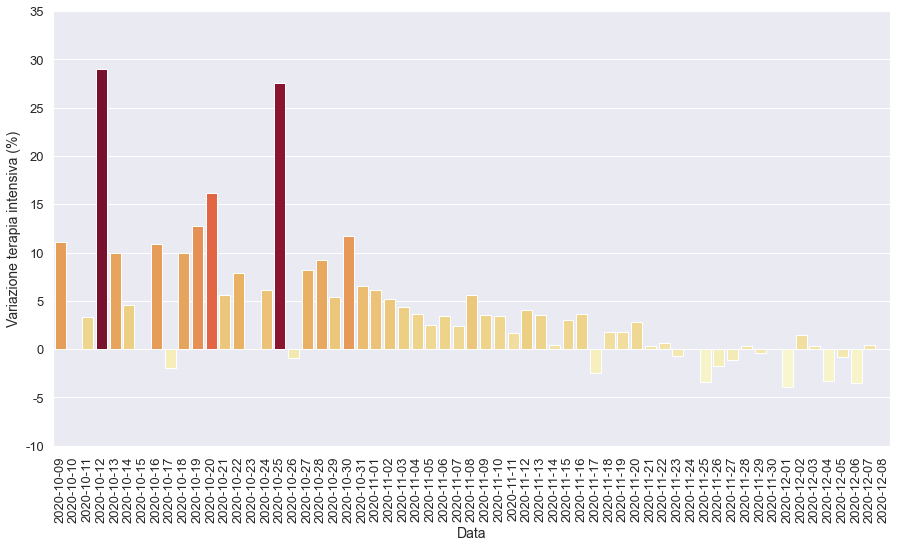

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

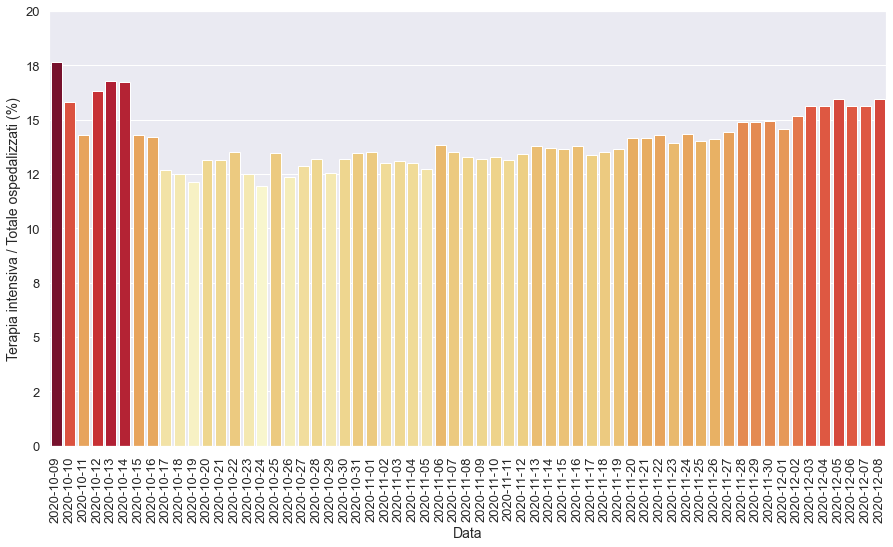

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

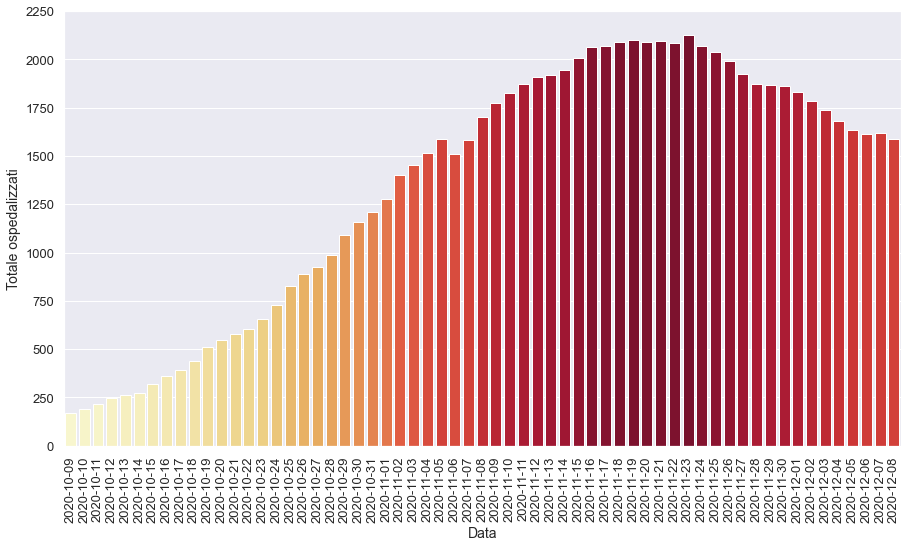

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

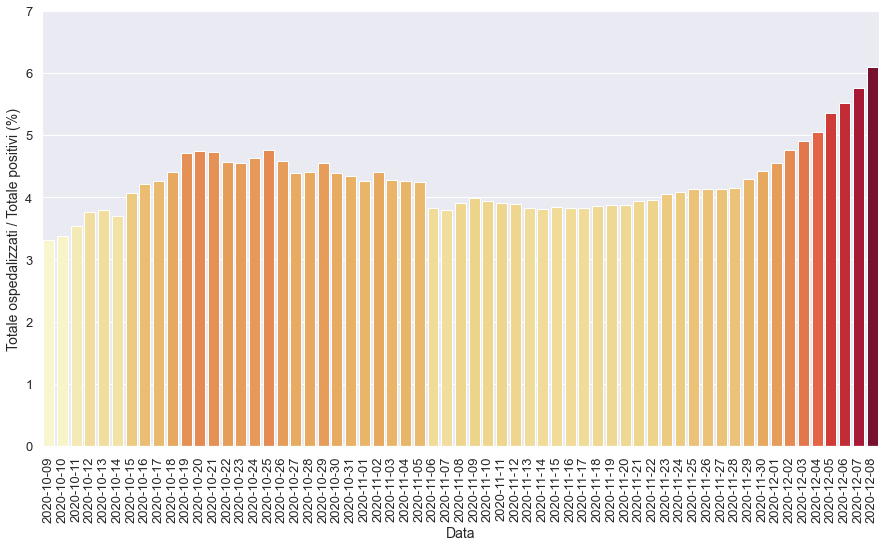

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

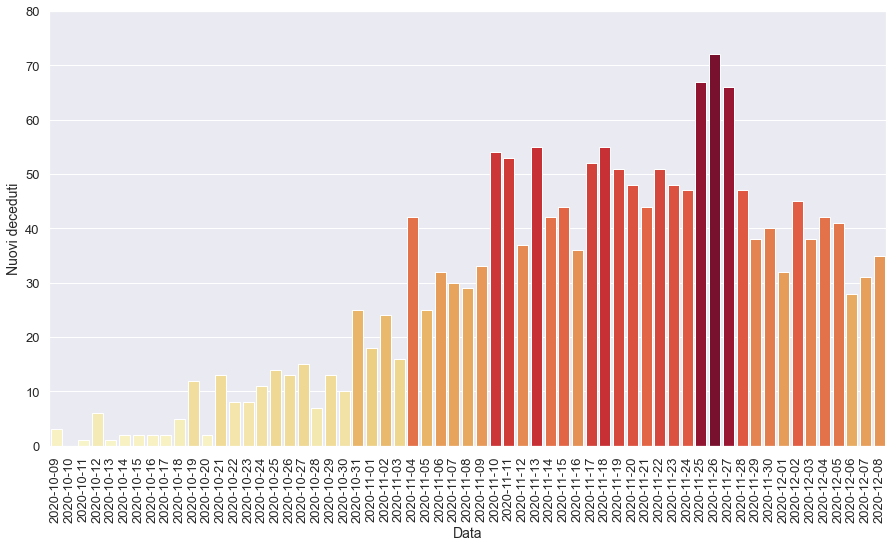

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

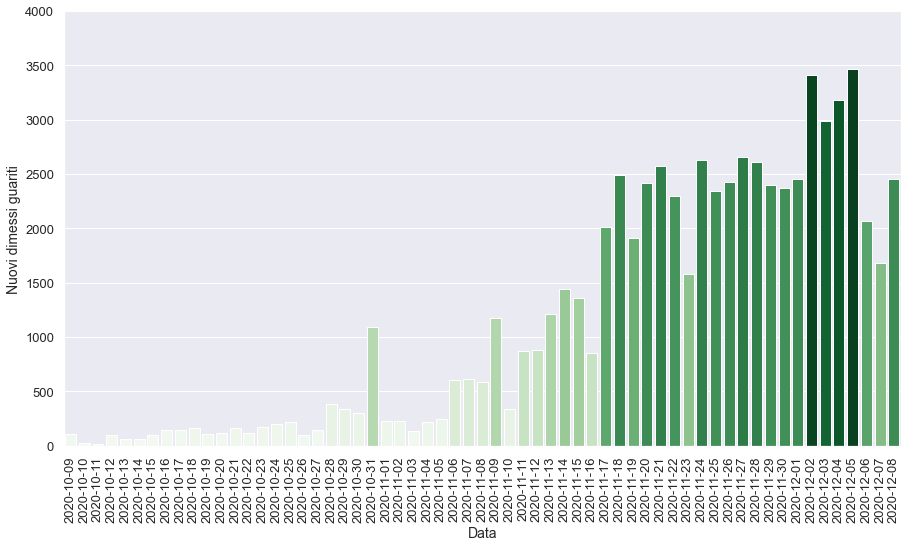

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-08T17:00:00,9,Toscana,1474,226,1700,41747,43447,1864,2479,...,29.0,15542.0,8264.0,1746.0,13.29,3.91,15.95,30.00,5.61,4.48
1,2020-11-09T17:00:00,9,Toscana,1542,234,1776,42704,44480,1033,2244,...,33.0,13690.0,7135.0,957.0,13.18,3.99,16.39,31.45,3.54,2.38
2,2020-11-10T17:00:00,9,Toscana,1582,242,1824,44490,46314,1834,2223,...,54.0,14248.0,7336.0,1786.0,13.27,3.94,15.60,30.30,3.42,4.12
3,2020-11-11T17:00:00,9,Toscana,1628,246,1874,46026,47900,1586,2507,...,53.0,17821.0,9150.0,1536.0,13.13,3.91,14.07,27.40,1.65,3.42
4,2020-11-12T17:00:00,9,Toscana,1653,256,1909,47007,48916,1016,1932,...,37.0,15786.0,7960.0,981.0,13.41,3.90,12.24,24.27,4.07,2.12
5,2020-11-13T17:00:00,9,Toscana,1656,265,1921,48208,50129,1213,2478,...,55.0,18423.0,8687.0,1201.0,13.79,3.83,13.45,28.53,3.52,2.48
6,2020-11-14T17:00:00,9,Toscana,1679,266,1945,49116,51061,932,2420,...,42.0,19184.0,8551.0,908.0,13.68,3.81,12.61,28.30,0.38,1.86
7,2020-11-15T17:00:00,9,Toscana,1734,274,2008,50300,52308,1247,2653,...,44.0,18737.0,8496.0,1184.0,13.65,3.84,14.16,31.23,3.01,2.44
8,2020-11-16T17:00:00,9,Toscana,1777,284,2061,51790,53851,1543,2433,...,36.0,15527.0,6513.0,1490.0,13.78,3.83,15.67,37.36,3.65,2.95
9,2020-11-17T17:00:00,9,Toscana,1792,277,2069,52083,54152,301,2361,...,52.0,15695.0,6961.0,293.0,13.39,3.82,15.04,33.92,-2.46,0.56


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

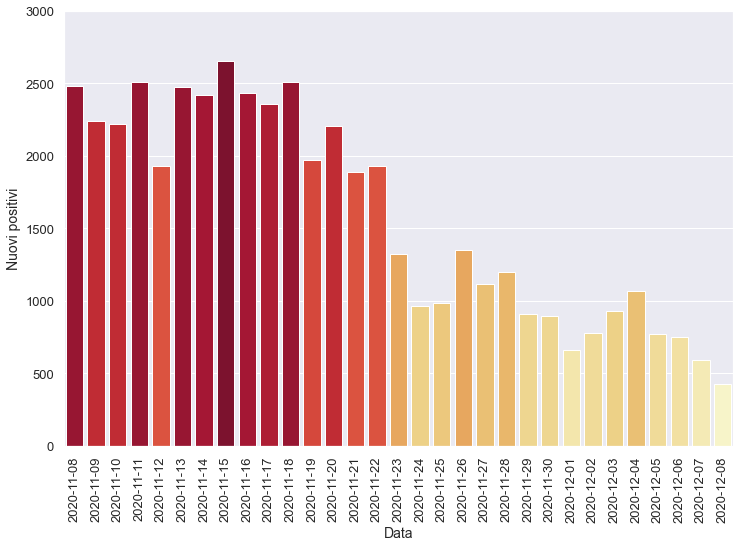

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

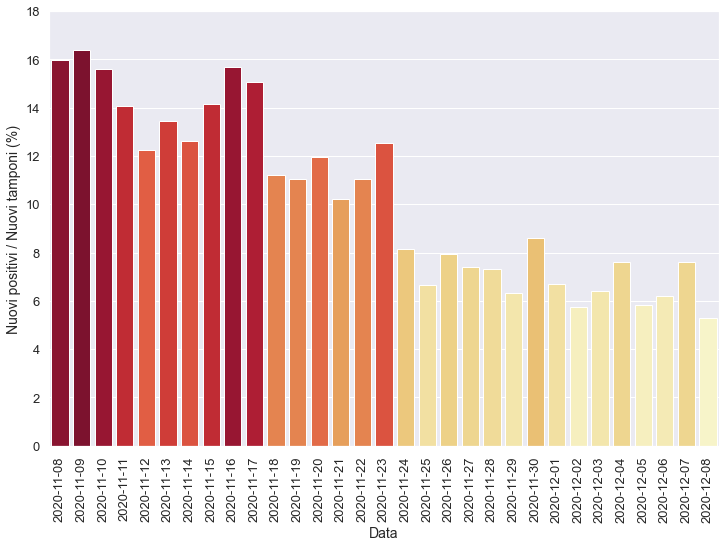

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

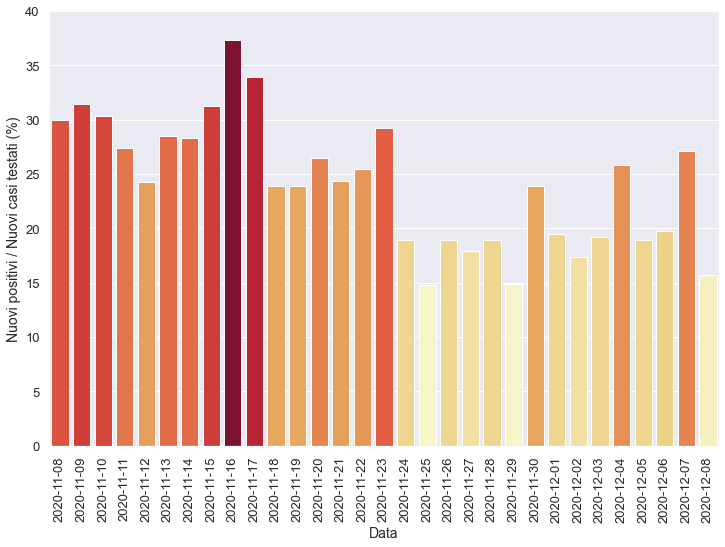

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

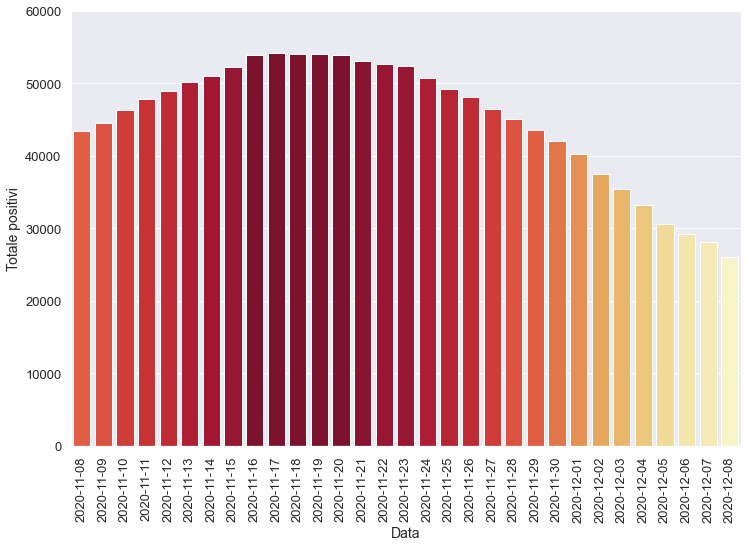

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

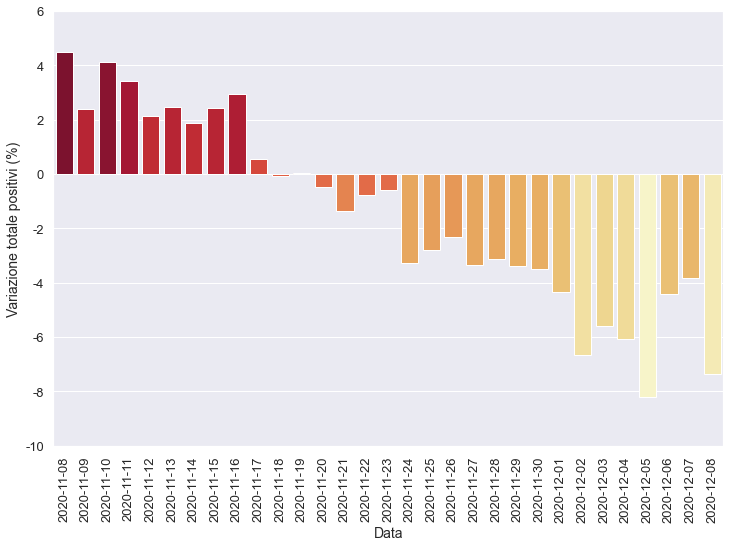

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

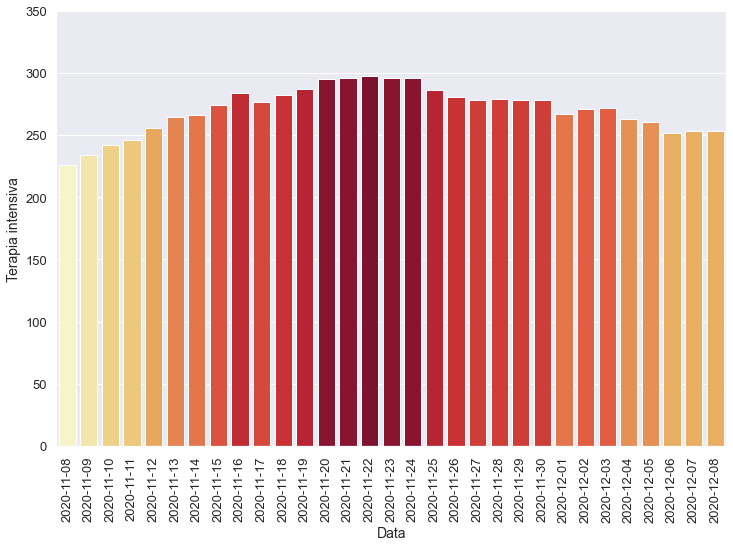

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

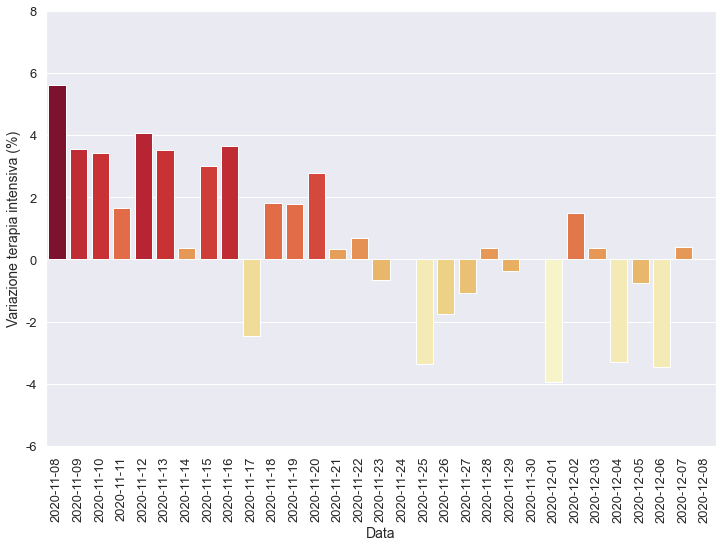

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

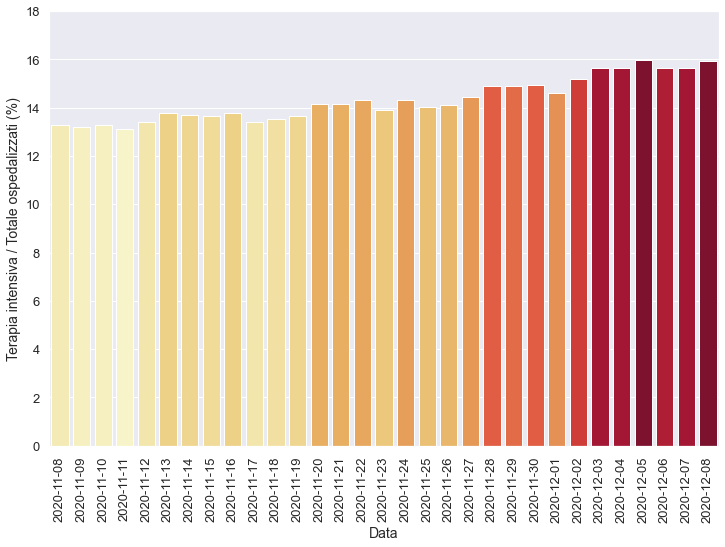

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

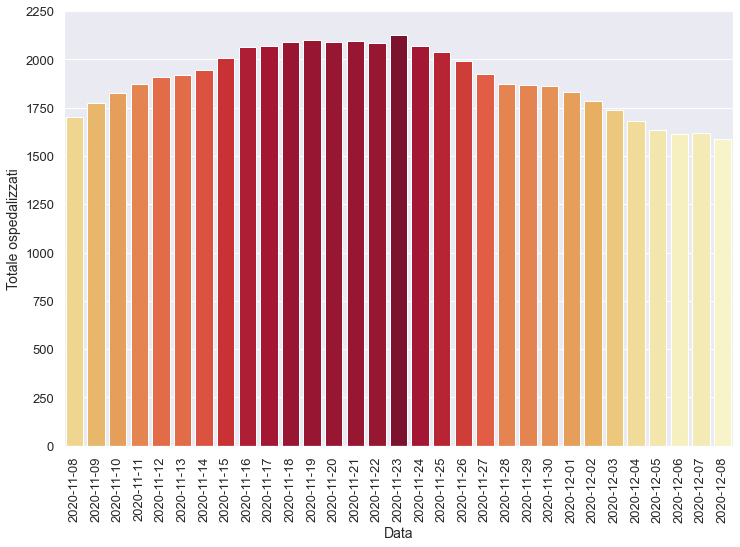

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

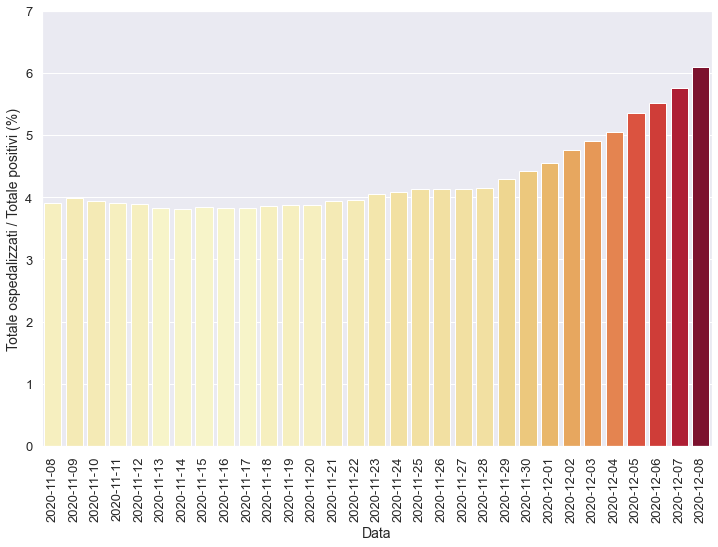

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

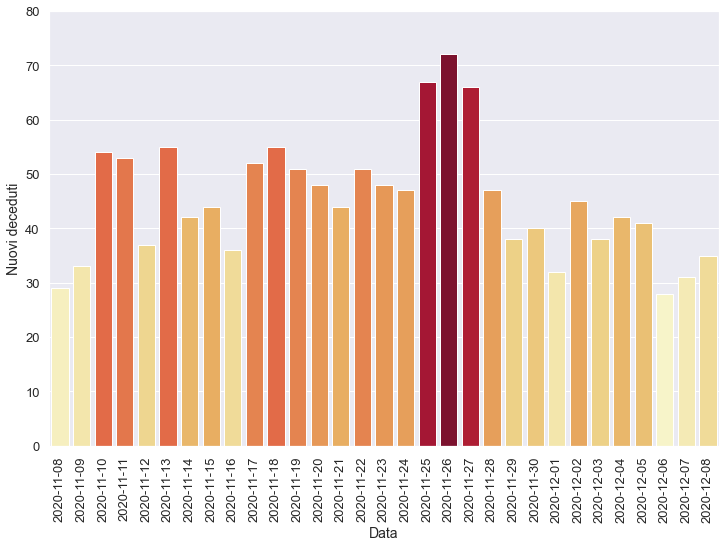

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

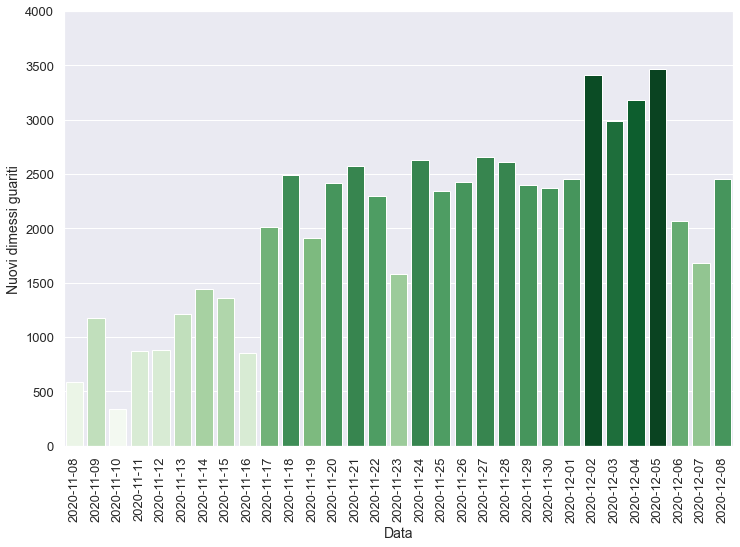

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-01T17:00:00,9,Toscana,1563,267,1830,38371,40201,-1825,658,...,32.0,9801.0,3385.0,-1793.0,14.59,4.55,6.71,19.44,-3.96,-4.34
1,2020-12-02T17:00:00,9,Toscana,1514,271,1785,35740,37525,-2676,776,...,45.0,13549.0,4461.0,-2631.0,15.18,4.76,5.73,17.40,1.50,-6.66
2,2020-12-03T17:00:00,9,Toscana,1467,272,1739,33691,35430,-2095,929,...,38.0,14469.0,4845.0,-2049.0,15.64,4.91,6.42,19.17,0.37,-5.58
3,2020-12-04T17:00:00,9,Toscana,1418,263,1681,31598,33279,-2151,1071,...,42.0,14074.0,4152.0,-2093.0,15.65,5.05,7.61,25.79,-3.31,-6.07
4,2020-12-05T17:00:00,9,Toscana,1373,261,1634,28910,30544,-2735,769,...,41.0,13229.0,4063.0,-2688.0,15.97,5.35,5.81,18.93,-0.76,-8.22
5,2020-12-06T17:00:00,9,Toscana,1360,252,1612,27587,29199,-1345,753,...,28.0,12142.0,3808.0,-1323.0,15.63,5.52,6.20,19.77,-3.45,-4.40
6,2020-12-07T17:00:00,9,Toscana,1365,253,1618,26466,28084,-1115,593,...,31.0,7812.0,2185.0,-1121.0,15.64,5.76,7.59,27.14,0.40,-3.82
7,2020-12-08T17:00:00,9,Toscana,1335,253,1588,24436,26024,-2060,428,...,35.0,8110.0,2730.0,-2030.0,15.93,6.10,5.28,15.68,0.00,-7.34


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

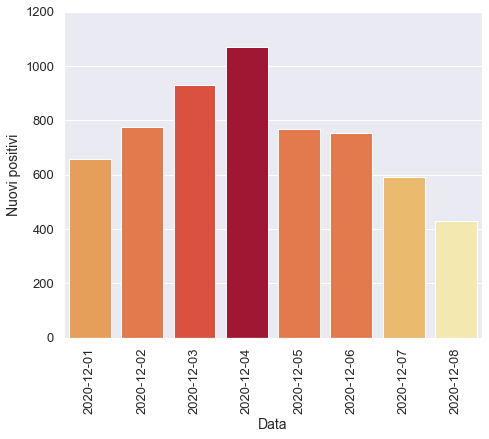

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

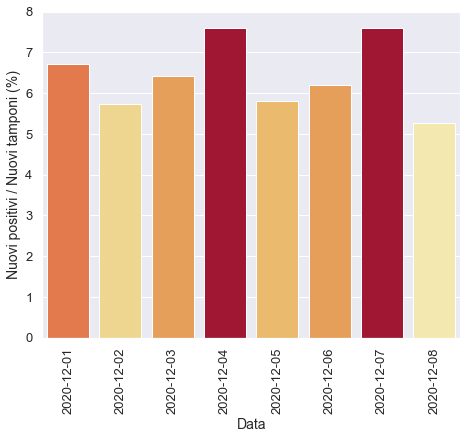

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

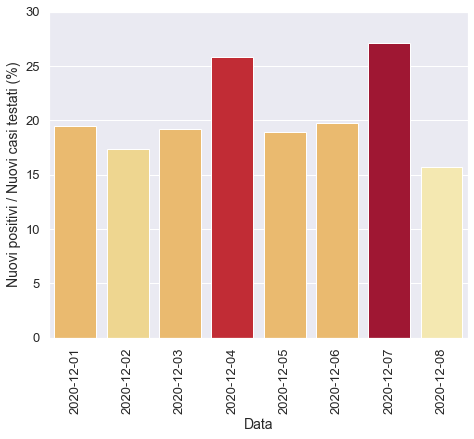

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

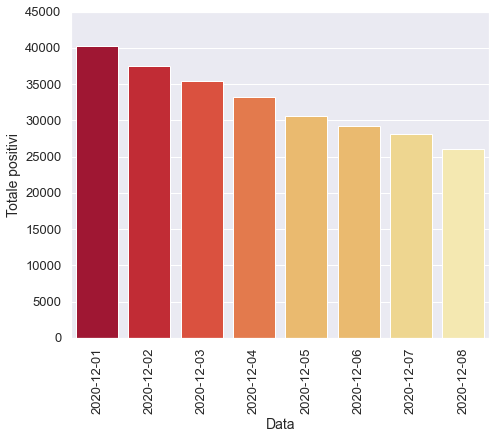

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

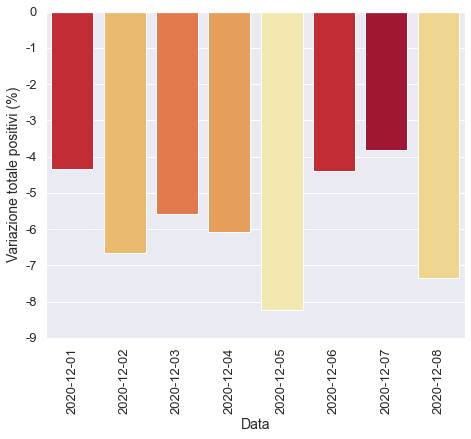

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

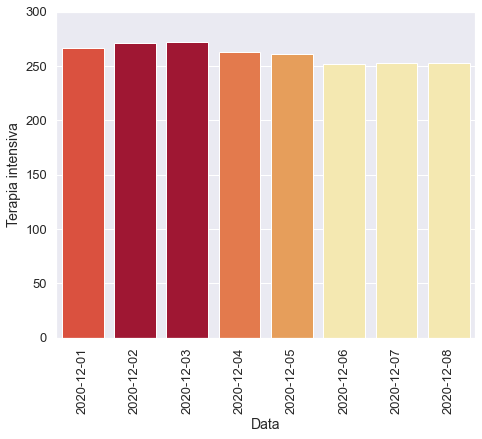

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

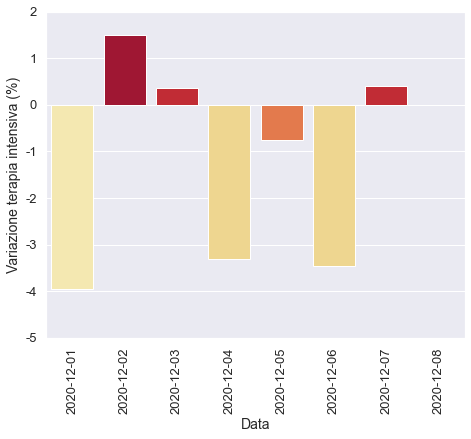

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

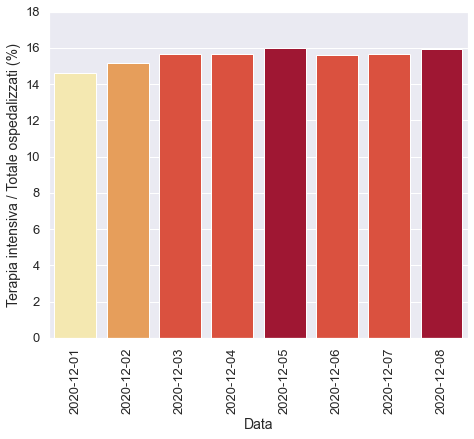

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

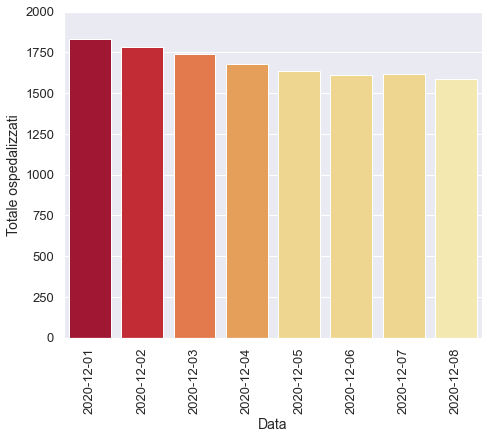

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

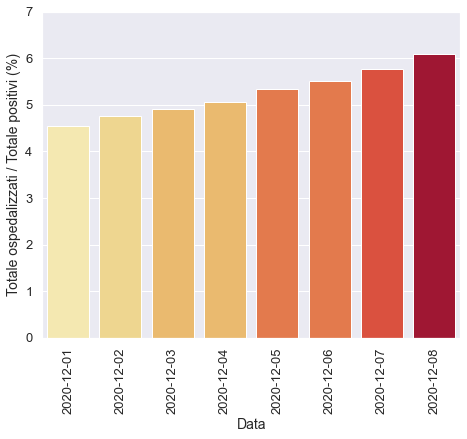

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

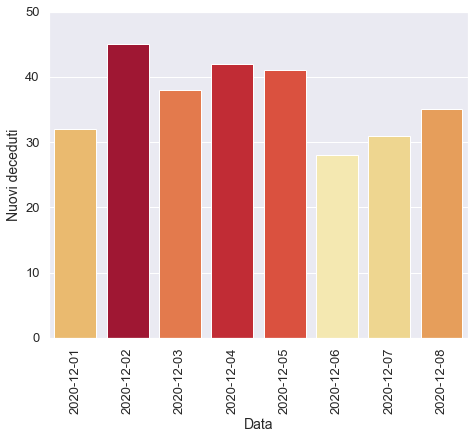

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

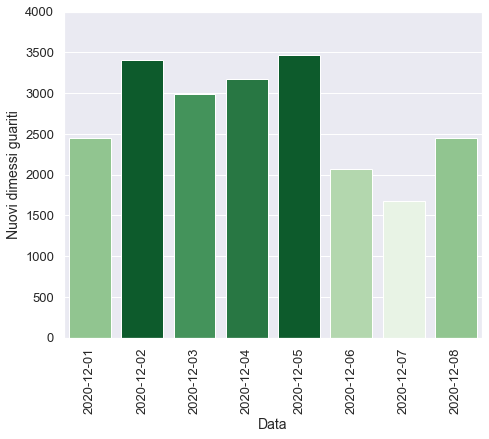

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)